In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [3]:
cancer = load_breast_cancer()

#### 유방암 데이터셋 시각화

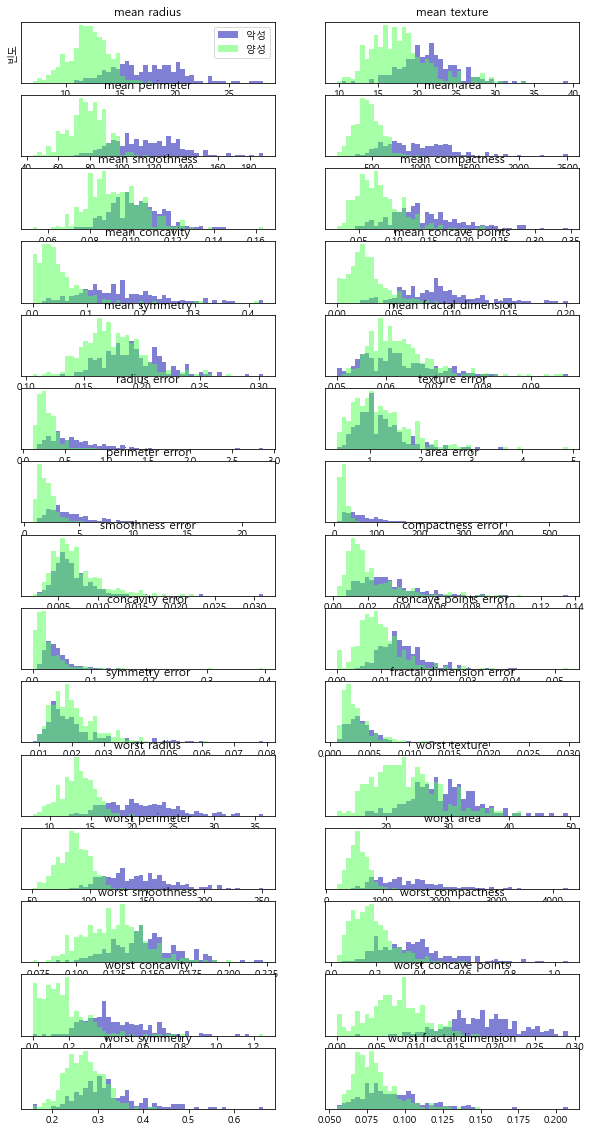

In [8]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target==0] #악성
benign = cancer.data[cancer.target==1] #양성

ax = axes.ravel() #

for i in range(30) : 
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성', '양성'], loc='best')

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

In [15]:
print('원본 데이터 형태 : ', str(x_scaled.shape))
print('축소된 데이터 형태 : ', str(x_pca.shape))

원본 데이터 형태 :  (569, 30)
축소된 데이터 형태 :  (569, 2)


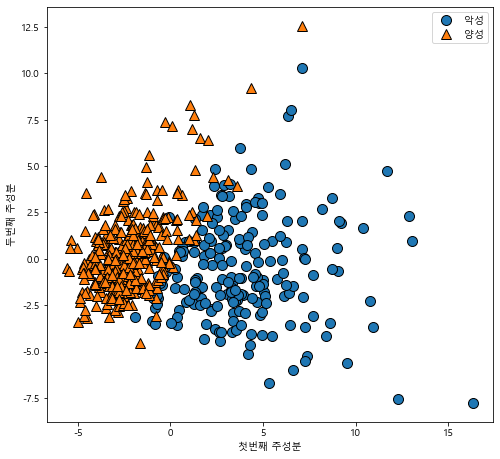

In [16]:
#클래스의 색깔로 구분해서 두 개의 주성분 그래프 그려보기
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],cancer.target)
plt.legend(['악성','양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()